# Ocean station Papa

This notebook compares the Stokes drift profiles of different estimates in the [ocean station Papa](https://www.pmel.noaa.gov/ocs/Papa) case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *

## Load data

First, store the information of the four simulations into lists and dictionaries.

In [2]:
casenames = [
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]

colors = {
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

rundates = {
    '2012-03-21': '2012-05-21',
    '2012-05-21': '2012-08-21',
    '2012-08-21': '2013-01-12',
    '2013-01-12': '2013-03-21',
    }

casedir1 = '../gotm/run/OSPapa'
casedir2 = '../gotm/run/OSPapa_theory_wave'
casedir3 = '../gotm/run/OSPapa_const_La'
save_fig = True

Load data for the four simulations and four stages into a dictionary.

In [3]:
def load_data(casedir, casenames):
    sims = {}
    dataset = {}
    for case in casenames:
        sims0 = {}
        dataset0 = {}
        for start in rundates.keys():
            end = rundates[start]
            sim = Simulation(path=casedir+'/'+case+'_'+start+'_'+end)
            sims0[start] = sim
            dataset0[start] = sim.load_data()
        sims[case] = sims0
        dataset[case] = dataset0
    return sims, dataset


In [4]:
sims1, dataset1 = load_data(casedir1, casenames)
sims2, dataset2 = load_data(casedir2, casenames)
sims3, dataset3 = load_data(casedir3, casenames)

## Figure

A comparison of the Stokes drift profiles estimated from the observed wave spectrum in black, "theory wave" approach of [Li et al., 2017](https://doi.org/10.1016/j.ocemod.2017.03.016) in blue and an idealized exponential profile with La$_t=0.3$ and $\delta^S=5$ m in green during the four stages of a seasonal cycle at the Ocean Station Papa.

In [5]:
def plot_pfl_dist(ds, ax, color='tab:blue', label=None):
    ds.median(dim='time').plot(
        ax=ax, color=color, linestyle='-', y='z', label=label)
    q75 = ds.quantile(0.75, dim='time')
    q25 = ds.quantile(0.25, dim='time')
    q90 = ds.quantile(0.9, dim='time')
    q10 = ds.quantile(0.1, dim='time')
    z = ds.z
    ax.fill_betweenx(z, q10, q90, facecolor=color, edgecolor='none', alpha=0.15)
    ax.fill_betweenx(z, q25, q75, facecolor=color, edgecolor='none', alpha=0.3)

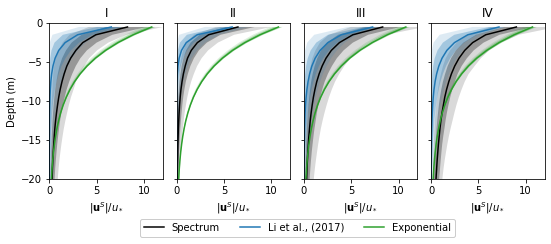

In [6]:
fig, axarr = plt.subplots(1,4,sharey='row')
fig.set_size_inches([8,3.5])
stages = ['I', 'II', 'III', 'IV']
for i, start in enumerate(rundates.keys()):
    
    data1 = dataset1['KPP-CVMix'][start]
    data2 = dataset2['KPP-CVMix'][start]
    data3 = dataset3['KPP-CVMix'][start]
    
    color1 = 'k'
    us1 = data1.us[:,1:,0,0]
    vs1 = data1.vs[:,1:,0,0]
    ustar1 = data1.u_taus[1:,0,0]
    ustokes1 = np.sqrt(us1**2+vs1**2)/ustar1
    plot_pfl_dist(ustokes1, axarr[i], color1, 'Spectrum')
    
    color2 = 'tab:blue'
    us2 = data2.us[:,1:,0,0]
    vs2 = data2.vs[:,1:,0,0]
    ustar2 = data2.u_taus[1:,0,0]
    ustokes2 = np.sqrt(us2**2+vs2**2)/ustar2
    plot_pfl_dist(ustokes2, axarr[i], color2, 'Li et al., (2017)')
    
    color3 = 'tab:green'
    us3 = data3.us[:,1:,0,0]
    vs3 = data3.vs[:,1:,0,0]
    ustar3 = data3.u_taus[1:,0,0]
    ustokes3 = np.sqrt(us3**2+vs3**2)/ustar3
    plot_pfl_dist(ustokes3, axarr[i], color3, 'Exponential')
    
    axarr[i].set_xlim([0,12])
    axarr[i].set_xlabel(r'$|\mathbf{u}^S|/u_*$')
    axarr[i].set_ylim([-20,0])
    axarr[i].set_ylabel('')
    axarr[i].set_title(stages[i])
    
axarr[0].set_ylabel('Depth (m)')
# axarr[0].legend(loc='lower right')
axarr[0].legend(loc = 'lower left', fontsize=10, ncol=3,
                  bbox_to_anchor=(0.75, -0.4), framealpha=1)
    
if save_fig:
    plt.subplots_adjust(top=0.9, bottom=0.28, left=0.1, right=0.96, wspace=0.12)
    figname = 'ospapa_pfl_stokes.pdf'
    fig.savefig(figname, dpi=300)